<a href="https://colab.research.google.com/github/thanhnguyen2612/diveintocode-ml/blob/master/ML_Week4_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Problem 1] Confirmation of competition contents

# Introductory Machine Learning Class assignment and Learning Credit Information




*   Dataset contains a variety of alternative information about customers (telco, transactional info, etc.), and we have to create a model for learning and predicting client's repayment abilities.
*   Create csv submission file containing **SK_ID_CURR & TARGET** headers.
*   Evaluation metric: Receiver Operating Characteristic Area Under the Curve (ROC AUC).



## [Problem 2] Learning and verification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("sample_data/application_train.csv", index_col='SK_ID_CURR')
df = data.drop("TARGET", axis=1)
df.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
print("Training data shape:", df.shape)

Training data shape: (307511, 120)


['NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR' 'FLAG_OWN_REALTY'
 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT' 'AMT_ANNUITY'
 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'YEARS_BEGINEXPLUATATION_AVG' 'YEARS_BUILD_AVG' 'COMMONAREA_AVG'
 'ELEVATORS_AVG' 'ENTRANCES_AVG' 'FLOORSMAX_AVG' 'FLOORSMIN_A

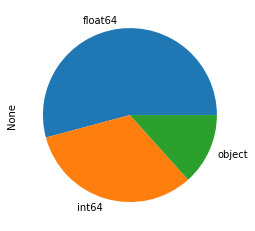

In [4]:
print(df.columns.values)
df.dtypes.value_counts().plot.pie()
plt.show()

In [5]:
# Check missing value ratios
pd.set_option('display.max_row', 122)
pd.set_option('display.max_column', 122)
print((df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False))

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_MEDI               58.515956
EXT_SOURCE_1                    56

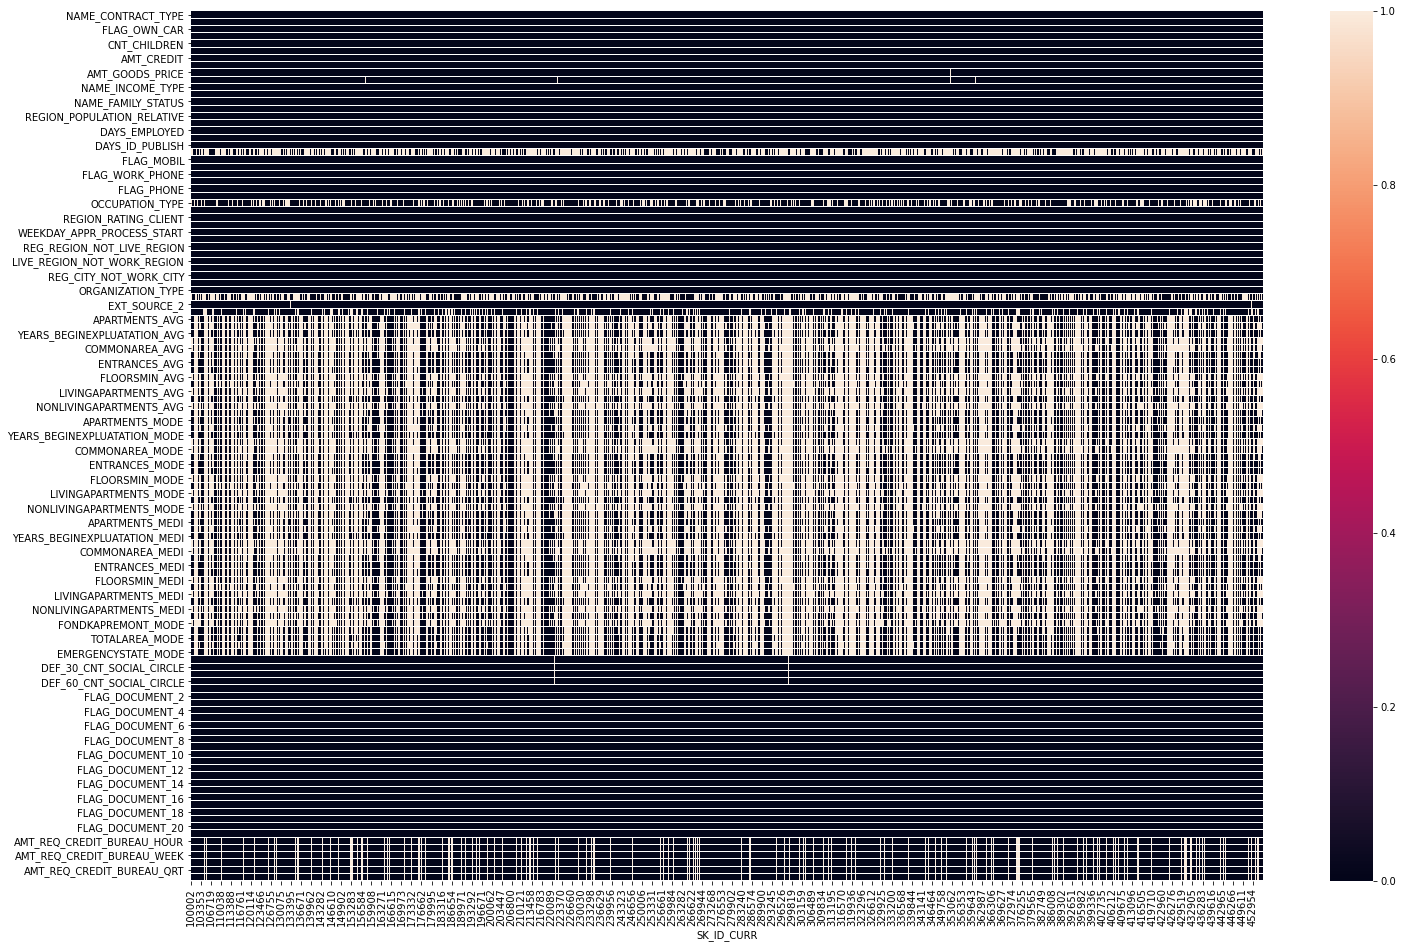

In [6]:
# Show heatmap of missing value amount
plt.figure(figsize=(24, 16))
sns.heatmap(df.isna().T)
plt.show()

In [7]:
# Training set imbalance
data['TARGET'].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [ ]:
# Check continuous data columns
for col in df.select_dtypes(include='float'):
    plt.figure()
    sns.histplot(data=df, x=col, bins=50, stat='density', kde=True)
    plt.show()

In [9]:
# Check discrete data columns
for col in df.select_dtypes(include='int'):
    print(f"{col:-<50}: {df[col].nunique()}")

CNT_CHILDREN--------------------------------------: 15
DAYS_BIRTH----------------------------------------: 17460
DAYS_EMPLOYED-------------------------------------: 12574
DAYS_ID_PUBLISH-----------------------------------: 6168
FLAG_MOBIL----------------------------------------: 2
FLAG_EMP_PHONE------------------------------------: 2
FLAG_WORK_PHONE-----------------------------------: 2
FLAG_CONT_MOBILE----------------------------------: 2
FLAG_PHONE----------------------------------------: 2
FLAG_EMAIL----------------------------------------: 2
REGION_RATING_CLIENT------------------------------: 3
REGION_RATING_CLIENT_W_CITY-----------------------: 3
HOUR_APPR_PROCESS_START---------------------------: 24
REG_REGION_NOT_LIVE_REGION------------------------: 2
REG_REGION_NOT_WORK_REGION------------------------: 2
LIVE_REGION_NOT_WORK_REGION-----------------------: 2
REG_CITY_NOT_LIVE_CITY----------------------------: 2
REG_CITY_NOT_WORK_CITY----------------------------: 2
LIVE_CITY_NOT_W

Column selectors

In [17]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

discrete_cols = df.select_dtypes(include='int').columns.tolist()

# Bring high cordinality columns to numerical pipeline
numerical_cols = df.select_dtypes(include='float').columns.tolist() \
                    + [col for col in discrete_cols if df[col].nunique() >= 30]
low_card_discrete_cols = [col for col in discrete_cols if df[col].nunique() < 30]
categorical_cols = df.select_dtypes(include='object').columns.tolist()

Create baseline model

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

# Column preprocessing
numerical_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                   StandardScaler())
low_card_discrete_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"))
categorical_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                                     OneHotEncoder())

preprocessor = make_column_transformer((numerical_pipeline, numerical_cols),
                                       (SimpleImputer(strategy="most_frequent"), low_card_discrete_cols),
                                       (categorical_pipeline, categorical_cols))

In [19]:
from sklearn.model_selection import train_test_split

X, y = data.drop('TARGET', axis=1), data['TARGET']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(230633, 120) (76878, 120) (230633,) (76878,)


In [ ]:
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

In [16]:
model = make_pipeline(preprocessor, SGDClassifier(loss='log', random_state=0))
model.fit(X_train, y_train)
model.score(X_val, y_val)

ValueError: ignored

In [ ]:
from sklearn.metrics import roc_auc_score, plot_roc_curve
    
y_pred = model.predict(X_val)
# y_score = model.predict_proba(X_val)
# score = roc_auc_score(y_val, y_score[:,1])
# print("ROC score:", score)
# plot_roc_curve(model, X_val, y_val, drop_intermediate=False, name="Baseline")
# plt.plot([0, 1], [0, 1], linestyle='--', color='r')
# plt.show()

Baseline result

In [ ]:
df_test = pd.read_csv("sample_data/application_test.csv", index_col='SK_ID_CURR')

preds_test = model.predict(df_test)
output_df = pd.DataFrame({"SK_ID_CURR": df_test.index,
                          "TARGET": preds_test})
print(output_df.head())